# data prepare

In [36]:
import pandas as pd
import os
from PIL import Image
import torch
import numpy as np

In [12]:
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')

In [116]:
filenames= os.listdir(r'/home/tongqing.li/qianbao/picture_score/data/face_pictures')
filenames_df=pd.DataFrame(filenames)
filenames_df.columns=['filename']
filenames_df['applied_id']=filenames_df['filename'].map(lambda x:x.split('_')[0])
filenames_df=filenames_df.sort_values('filename',ascending=False)
filenames_df=filenames_df.groupby('applied_id').head(1)
"""
filenames_df["Eyeglasses"] = " "
filenames_df["Heavy_Makeup"] = " "
filenames_df["Male"] = " "
filenames_df["Wearing_Earrings"] = " "
filenames_df["Wearing_Necktie"] = " "
filenames_df["Attractive"] = " "
filenames_df["Wearing_Hat"] = " "
"""
filenames_df

,filename,applied_id
570935,52697741_04.jpg,52697741
570434,52697322_04.jpg,52697322
570139,52697214_04.jpg,52697214
570114,52697150_04.jpg,52697150
569999,52697100_04.jpg,52697100
571190,52697044_04.jpg,52697044
572922,52696984_04.jpg,52696984
572584,52696934_04.jpg,52696934
572653,52696760_04.jpg,52696760
571858,52696225_04.jpg,52696225


In [156]:
filenames_df['filename1'] = filenames_df['filename'].map(lambda x: x.split('_')[0]+'_03.jpg')

In [157]:
filenames_df

,filename,applied_id,filename1
570935,52697741_04.jpg,52697741,52697741_03.jpg
570434,52697322_04.jpg,52697322,52697322_03.jpg
570139,52697214_04.jpg,52697214,52697214_03.jpg
570114,52697150_04.jpg,52697150,52697150_03.jpg
569999,52697100_04.jpg,52697100,52697100_03.jpg
571190,52697044_04.jpg,52697044,52697044_03.jpg
572922,52696984_04.jpg,52696984,52696984_03.jpg
572584,52696934_04.jpg,52696934,52696934_03.jpg
572653,52696760_04.jpg,52696760,52696760_03.jpg
571858,52696225_04.jpg,52696225,52696225_03.jpg


In [17]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo


__all__ = ['ResNet', 'resnet50']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
}


def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = conv1x1(inplanes, planes)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = conv3x3(planes, planes, stride)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = conv1x1(planes, planes * self.expansion)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class fc_block(nn.Module):
    def __init__(self, inplanes, planes, drop_rate=0.15):
        super(fc_block, self).__init__()
        self.fc = nn.Linear(inplanes, planes)
        self.bn = nn.BatchNorm1d(planes)
        if drop_rate > 0:
            self.dropout = nn.Dropout(drop_rate)
        self.relu = nn.ReLU(inplace=True)
        self.drop_rate = drop_rate

    def forward(self, x):
        x = self.fc(x)
        x = self.bn(x)
        if self.drop_rate > 0:
            x = self.dropout(x)
        x = self.relu(x)
        return x


class ResNet(nn.Module):

    def __init__(self, block, layers, num_attributes=7, zero_init_residual=False):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.stem = fc_block(512 * block.expansion, 512)
        for i in range(num_attributes):
            setattr(self, 'classifier' + str(i).zfill(2), nn.Sequential(fc_block(512, 256), nn.Linear(256, 2)))
        self.num_attributes = num_attributes

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.stem(x)

        y = []
        for i in range(self.num_attributes):
            classifier = getattr(self, 'classifier' + str(i).zfill(2))
            y.append(classifier(x))

        return y


def resnet50(pretrained=True, **kwargs):
    """Constructs a ResNet-50 model.

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs)
    if pretrained:
        init_pretrained_weights(model, model_urls['resnet50'])
    return model

def resnet18(pretrained=True, **kwargs):
    """Constructs a ResNet-50 model.

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    
    if pretrained:
        init_pretrained_weights(model, model_urls['resnet18'])
    return model

def init_pretrained_weights(model, model_url):
    """
    Initialize model with pretrained weights.
    Layers that don't match with pretrained layers in name or size are kept unchanged.
    """
    pretrain_dict = model_zoo.load_url(model_url)
    model_dict = model.state_dict()
    pretrain_dict = {k: v for k, v in pretrain_dict.items() if k in model_dict and model_dict[k].size() == v.size()}
    model_dict.update(pretrain_dict)
    model.load_state_dict(model_dict)
    print("Initialized model with pretrained weights from {}".format(model_url))



In [92]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = resnet50()
model.load_state_dict(torch.load(r'/home/tongqing.li/qianbao/deep_learning/neural_network_in_pytorch/deep_model/model3'))
model.eval()
model.to(device)

Initialized model with pretrained weights from https://download.pytorch.org/models/resnet50-19c8e357.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [160]:
from torchvision import datasets, transforms
softmax = nn.Softmax()
transform = transforms.Compose([transforms.Resize((224,224)), transforms.CenterCrop(224),transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
cutoff = [0.660366, 0.85387325, 0.07269065, 0.9326168, 0.9293804, 0.83505094, 0.72232795]
newList = []
with torch.no_grad():
    for i, j in enumerate(filenames_df['filename1']):
        picture = pil_loader(r'/home/tongqing.li/qianbao/picture_score/data/face_pictures/' + str(j))
        picture = transform(picture).unsqueeze(0).to(device)
        out = model(picture)
        inserts = [j]
        for k in range(len(out)):
            out[k] = softmax(out[k])
            out[k][0][1]
            inserts.append(float(out[k][0][1]))
        newList.append(inserts)
        if (i % 500 == 0):
            print(i)
        #print(inserts)

/home/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500
78000
78500
79000
79500
80000
80500
81000
81500
82000
82500
83000
83500
84000
84500
8500

In [162]:
new = pd.DataFrame(newList, columns = ['filename1', "Eyeglasses", "Heavy_Makeup", "Male", "Wearing_Earrings", "Wearing_Necktie", 'Attractive', 'Wearing_Hat'])
new

,filename1,Eyeglasses,Heavy_Makeup,Male,Wearing_Earrings,Wearing_Necktie,Attractive,Wearing_Hat
0,52697741_03.jpg,0.000674,0.002308,0.302895,0.025466,0.001164,0.000332,0.001025
1,52697322_03.jpg,0.003457,0.005363,0.292629,0.017999,0.008839,0.003745,0.000528
2,52697214_03.jpg,0.000774,0.025004,0.063182,0.113585,0.000650,0.007845,0.001770
3,52697150_03.jpg,0.000342,0.138134,0.012456,0.204334,0.000092,0.037618,0.001060
4,52697100_03.jpg,0.000437,0.399672,0.045094,0.052942,0.000216,0.444719,0.001802
5,52697044_03.jpg,0.000829,0.011280,0.189606,0.069129,0.002842,0.013522,0.003495
6,52696984_03.jpg,0.007712,0.001604,0.915662,0.040553,0.032953,0.001299,0.000256
7,52696934_03.jpg,0.011304,0.000871,0.828741,0.035456,0.038174,0.001459,0.012761
8,52696760_03.jpg,0.000163,0.041919,0.083482,0.094497,0.000388,0.038317,0.002114
9,52696225_03.jpg,0.000109,0.046792,0.002787,0.243244,0.000063,0.010305,0.000323


In [172]:
for i, j in enumerate(["Eyeglasses", "Heavy_Makeup", "Male", "Wearing_Earrings", "Wearing_Necktie", 'Attractive', 'Wearing_Hat']):
    new[j+'_flag']=new[j].map(lambda x: 1 if(x>=cutoff[i]) else 0)


In [214]:
new = pd.read_csv(r'/home/tongqing.li/qianbao/deep_learning/neural_network_in_pytorch/data/picture_score_probability.csv')

In [272]:
count = 0
for i, j in enumerate(new["Wearing_Necktie"]):
    if (j > 0.7454451):
        count = count + 1
        print(new.iloc[i:i+1]["filename"])
        
print(count)

63    52687506_04.jpg
Name: filename, dtype: object
83    52685366_04.jpg
Name: filename, dtype: object
1190    52516141_04.jpg
Name: filename, dtype: object
1333    52495119_04.jpg
Name: filename, dtype: object
1816    52434617_04.jpg
Name: filename, dtype: object
1857    52430964_04.jpg
Name: filename, dtype: object
2151    52374402_04.jpg
Name: filename, dtype: object
2321    52352726_04.jpg
Name: filename, dtype: object
2380    52345955_04.jpg
Name: filename, dtype: object
2630    52310574_04.jpg
Name: filename, dtype: object
2721    52299089_04.jpg
Name: filename, dtype: object
2937    52262190_04.jpg
Name: filename, dtype: object
3255    52213476_04.jpg
Name: filename, dtype: object
3751    52145789_04.jpg
Name: filename, dtype: object
3789    52141339_04.jpg
Name: filename, dtype: object
3874    52127692_04.jpg
Name: filename, dtype: object
4277    52053290_04.jpg
Name: filename, dtype: object
4291    52051315_04.jpg
Name: filename, dtype: object
4890    51934829_04.jpg
Name: fi

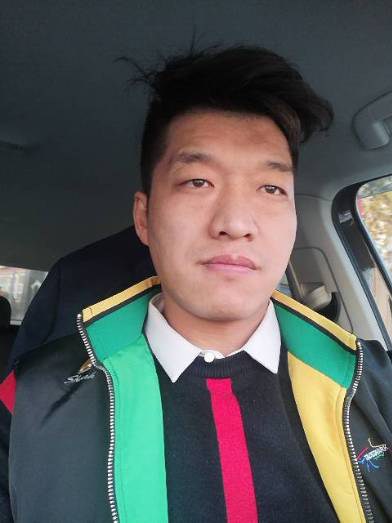

In [290]:
picture = pil_loader(r'/home/tongqing.li/qianbao/picture_score/data/face_pictures/50260824_04.jpg')
picture

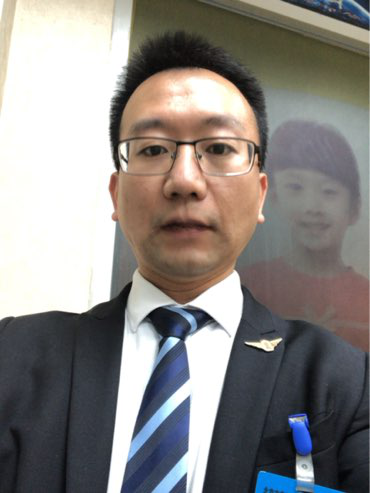

In [204]:
picture = pil_loader(r'/home/tongqing.li/qianbao/picture_score/data/face_pictures/52687506_04.jpg')
picture

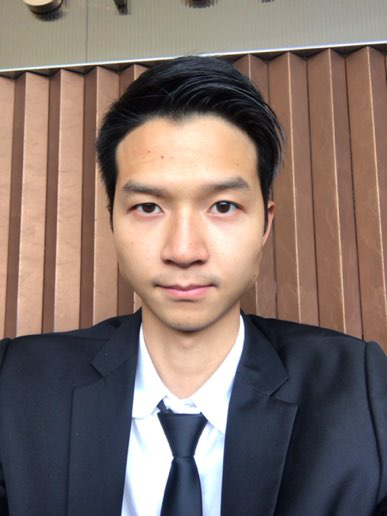

In [205]:
picture = pil_loader(r'/home/tongqing.li/qianbao/picture_score/data/face_pictures/52299089_04.jpg')
picture

In [133]:
filenames_df

,filename,applied_id
570935,52697741_04.jpg,52697741
570434,52697322_04.jpg,52697322
570139,52697214_04.jpg,52697214
570114,52697150_04.jpg,52697150
569999,52697100_04.jpg,52697100
571190,52697044_04.jpg,52697044
572922,52696984_04.jpg,52696984
572584,52696934_04.jpg,52696934
572653,52696760_04.jpg,52696760
571858,52696225_04.jpg,52696225


In [174]:
a = pd.merge(filenames_df, new, on='filename1')
a

,filename,applied_id,filename1,Eyeglasses,Heavy_Makeup,Male,Wearing_Earrings,Wearing_Necktie,Attractive,Wearing_Hat,Eyeglasses_flag,Heavy_Makeup_flag,Male_flag,Wearing_Earrings_flag,Wearing_Necktie_flag,Attractive_flag,Wearing_Hat_flag
0,52697741_04.jpg,52697741,52697741_03.jpg,0.000674,0.002308,0.302895,0.025466,0.001164,0.000332,0.001025,0,0,1,0,0,0,0
1,52697322_04.jpg,52697322,52697322_03.jpg,0.003457,0.005363,0.292629,0.017999,0.008839,0.003745,0.000528,0,0,1,0,0,0,0
2,52697214_04.jpg,52697214,52697214_03.jpg,0.000774,0.025004,0.063182,0.113585,0.000650,0.007845,0.001770,0,0,0,0,0,0,0
3,52697150_04.jpg,52697150,52697150_03.jpg,0.000342,0.138134,0.012456,0.204334,0.000092,0.037618,0.001060,0,0,0,0,0,0,0
4,52697100_04.jpg,52697100,52697100_03.jpg,0.000437,0.399672,0.045094,0.052942,0.000216,0.444719,0.001802,0,0,0,0,0,0,0
5,52697044_04.jpg,52697044,52697044_03.jpg,0.000829,0.011280,0.189606,0.069129,0.002842,0.013522,0.003495,0,0,1,0,0,0,0
6,52696984_04.jpg,52696984,52696984_03.jpg,0.007712,0.001604,0.915662,0.040553,0.032953,0.001299,0.000256,0,0,1,0,0,0,0
7,52696934_04.jpg,52696934,52696934_03.jpg,0.011304,0.000871,0.828741,0.035456,0.038174,0.001459,0.012761,0,0,1,0,0,0,0
8,52696760_04.jpg,52696760,52696760_03.jpg,0.000163,0.041919,0.083482,0.094497,0.000388,0.038317,0.002114,0,0,1,0,0,0,0
9,52696225_04.jpg,52696225,52696225_03.jpg,0.000109,0.046792,0.002787,0.243244,0.000063,0.010305,0.000323,0,0,0,0,0,0,0


In [175]:
a.to_csv(r'/home/tongqing.li/qianbao/deep_learning/neural_network_in_pytorch/data/picture_score_probability_03.csv')